In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
url='https://github.com/wujinja-cgu/PyCaret-Anomaly-Detection/releases/download/mydata_COVID-19_Autoenocder/mydata_COVID19.csv'
df = pd.read_csv(url)
df.head(10)

,diff,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256
0,Y,0.609287,-0.114708,1.873611,0.723241,-18.583570,-2.167496,0.943664,-1.583638,0.564760,...,-0.736174,1.419370,-2.984402,0.411443,-5.120366,-1.142536,1.722576,-1.629901,-0.049432,-14.588076
1,Y,12.001138,0.395941,1.253045,0.116624,-30.560545,-1.958997,0.010296,-0.400378,0.224743,...,-0.565072,0.665200,3.489962,1.348775,-1.257218,-1.639898,1.189502,-2.011475,-0.391746,-22.910946
2,Y,43.223827,0.018741,3.222163,0.632186,-39.906130,-0.889479,-1.529962,-0.696772,0.636895,...,-0.335383,1.399736,4.634891,1.420937,-1.397370,-2.081937,0.077978,-1.362791,-0.329889,13.453539
3,Y,36.498253,-0.837654,3.107058,1.460295,-47.252068,-1.670387,-3.067684,0.346645,1.192981,...,-0.950800,1.806277,15.955308,1.618619,-3.546632,-3.851397,-0.495885,-1.965701,-0.570861,20.740270
4,Y,13.625356,0.039084,2.365281,0.896835,-13.611695,-0.392704,-0.507420,-1.243848,0.813950,...,0.060127,1.197377,-12.125166,0.396103,-0.442918,-0.583232,-0.076740,0.138185,0.330057,23.024880
5,Y,31.506899,-0.286971,2.781794,1.091773,-37.299183,-1.520670,-1.784558,-0.321445,0.750840,...,-0.736658,1.518667,6.501953,1.360406,-0.459692,-2.490657,-0.059866,-1.547161,-0.461263,8.098164
6,Y,32.978874,-0.280979,2.854572,1.085362,-37.761210,-1.483445,-1.831513,-0.327072,0.771838,...,-0.727077,1.530817,6.414480,1.406718,-0.483881,-2.499090,-0.084263,-1.554229,-0.450008,9.045090
7,Y,38.097810,-0.137707,2.857437,1.058756,-35.391304,-1.281926,-1.862218,-0.334572,0.776274,...,-0.749534,1.381527,7.109447,1.552898,-0.570403,-2.367575,-0.103854,-1.527349,-0.349603,9.664654
8,Y,31.820705,-0.518033,2.439496,0.551670,-10.146861,-0.395402,-0.952567,-0.482278,0.463081,...,-0.145635,0.911446,4.011349,0.698008,-1.250831,-1.132034,-0.067509,-0.711477,-0.037809,4.165742
9,Y,27.724415,-0.377751,2.785798,0.771994,-24.557144,-1.065880,-0.996842,-0.582116,0.492345,...,-0.402214,1.311906,-0.059896,1.095469,0.555703,-1.070132,-0.024490,-1.049766,-0.425218,9.665889


In [4]:
df.head()

,diff,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256
0,Y,0.609287,-0.114708,1.873611,0.723241,-18.583570,-2.167496,0.943664,-1.583638,0.564760,...,-0.736174,1.419370,-2.984402,0.411443,-5.120366,-1.142536,1.722576,-1.629901,-0.049432,-14.588076
1,Y,12.001138,0.395941,1.253045,0.116624,-30.560545,-1.958997,0.010296,-0.400378,0.224743,...,-0.565072,0.665200,3.489962,1.348775,-1.257218,-1.639898,1.189502,-2.011475,-0.391746,-22.910946
2,Y,43.223827,0.018741,3.222163,0.632186,-39.906130,-0.889479,-1.529962,-0.696772,0.636895,...,-0.335383,1.399736,4.634891,1.420937,-1.397370,-2.081937,0.077978,-1.362791,-0.329889,13.453539
3,Y,36.498253,-0.837654,3.107058,1.460295,-47.252068,-1.670387,-3.067684,0.346645,1.192981,...,-0.950800,1.806277,15.955308,1.618619,-3.546632,-3.851397,-0.495885,-1.965701,-0.570861,20.740270
4,Y,13.625356,0.039084,2.365281,0.896835,-13.611695,-0.392704,-0.507420,-1.243848,0.813950,...,0.060127,1.197377,-12.125166,0.396103,-0.442918,-0.583232,-0.076740,0.138185,0.330057,23.024880


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29979 entries, 0 to 29978
Columns: 257 entries, diff to V256
dtypes: float64(256), object(1)
memory usage: 58.8+ MB


In [6]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256
count,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,...,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000
mean,31.158756,-0.155024,2.867218,0.721161,-38.270049,-1.047406,-1.501089,-0.596286,0.749277,5.445869,...,-0.306985,1.468284,2.781585,1.169532,-1.687993,-2.209078,0.087438,-1.297727,-0.256364,12.669978
std,14.298337,0.451517,0.720633,0.513553,14.067612,0.540476,0.867643,0.589603,0.372144,12.703524,...,0.424510,0.305604,6.027147,0.561228,1.455345,0.790687,0.490272,0.495494,0.268627,10.917597
min,-26.135983,-3.940075,-0.936536,-1.468756,-98.286050,-3.605618,-4.784171,-2.298296,-0.620283,-46.562420,...,-3.094351,0.135470,-16.683620,-2.247828,-10.184219,-6.169991,-1.814849,-3.176718,-1.195443,-37.499820
25%,23.028462,-0.260614,2.612892,0.574068,-43.405600,-1.136182,-1.668575,-0.791664,0.636599,2.206419,...,-0.380410,1.390484,0.367699,1.103160,-1.874611,-2.250681,-0.041722,-1.402661,-0.344852,10.550646
50%,39.103794,0.035636,3.263602,0.603751,-42.497314,-0.905069,-1.566008,-0.771657,0.675170,3.994391,...,-0.258963,1.517491,3.140193,1.318740,-1.606561,-2.178966,0.063579,-1.350812,-0.333514,16.103476
75%,40.769276,0.054019,3.313740,0.900120,-33.878765,-0.859094,-1.420153,-0.471249,0.839234,7.884411,...,-0.206732,1.565212,3.903683,1.379059,-1.303326,-1.977215,0.153897,-1.174395,-0.258017,16.580425
max,58.311398,1.948995,3.855453,3.352186,22.162592,1.060721,1.396430,2.400821,2.517109,58.850872,...,2.081486,3.063347,31.554056,3.406446,5.565997,0.008074,2.176846,0.621551,1.277664,59.651420


In [ ]:
sns.pairplot(df)

In [7]:
df=df.drop(['diff'],axis=1)

In [8]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256
0,0.609287,-0.114708,1.873611,0.723241,-18.583570,-2.167496,0.943664,-1.583638,0.564760,22.651192,...,-0.736174,1.419370,-2.984402,0.411443,-5.120366,-1.142536,1.722576,-1.629901,-0.049432,-14.588076
1,12.001138,0.395941,1.253045,0.116624,-30.560545,-1.958997,0.010296,-0.400378,0.224743,33.994480,...,-0.565072,0.665200,3.489962,1.348775,-1.257218,-1.639898,1.189502,-2.011475,-0.391746,-22.910946
2,43.223827,0.018741,3.222163,0.632186,-39.906130,-0.889479,-1.529962,-0.696772,0.636895,3.633125,...,-0.335383,1.399736,4.634891,1.420937,-1.397370,-2.081937,0.077978,-1.362791,-0.329889,13.453539
3,36.498253,-0.837654,3.107058,1.460295,-47.252068,-1.670387,-3.067684,0.346645,1.192981,-7.272564,...,-0.950800,1.806277,15.955308,1.618619,-3.546632,-3.851397,-0.495885,-1.965701,-0.570861,20.740270
4,13.625356,0.039084,2.365281,0.896835,-13.611695,-0.392704,-0.507420,-1.243848,0.813950,-6.410505,...,0.060127,1.197377,-12.125166,0.396103,-0.442918,-0.583232,-0.076740,0.138185,0.330057,23.024880


<Axes: >

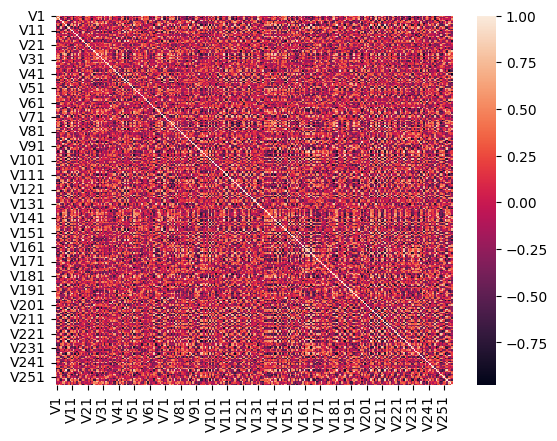

In [9]:
sns.heatmap(df.corr())

In [ ]:
plt.figure(figsize=(7,7))
size=df['Gender'].value_counts()
label=['Female','Male']
color=['Pink','Blue']
explode=[0,0.1]
plt.pie(size,explode=explode,labels=label,colors=color,shadow=True)
plt.legend()
plt.show()

**From the diagram we can say that females are more visiting to mall than males**

(array([0]), [Text(0, 0, '0')])

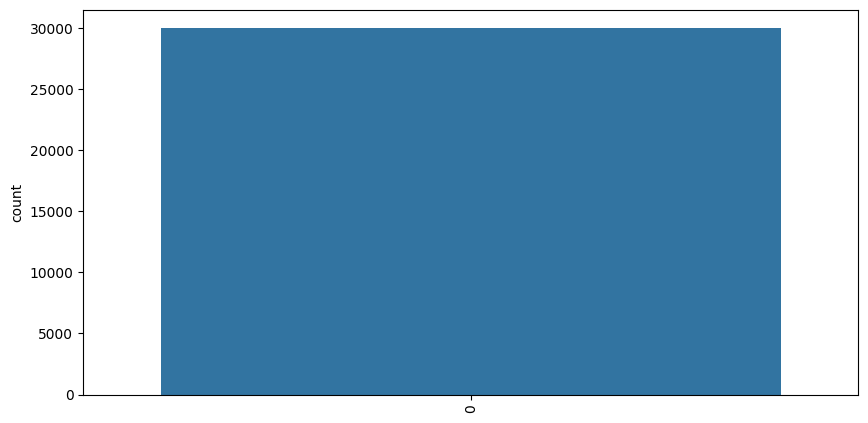

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(df['V1'])
plt.xticks(rotation=90)

**Peoples of age between 25 to 40 are mostly visiting mall than other age groups**

In [ ]:
sns.boxplot(df['Gender'],df['SpendScore'])

**This diagram shows the mean spendscore of female and male. we can observe that the mean average spend score of female is greater than male, they have higher spendscore than male,and their least spendscore is greater than males least spendscore**

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(df['Income'])


**Peoples of salary 54k and 78k are the mostly visited persons in mall.**

In [ ]:
plt.bar(df['Income'],df['SpendScore'])
plt.title('Spendscore over income',fontsize=20)
plt.xlabel('Income')
plt.ylabel('Spendscore')

**Peoples of income in the range of 20k-40k and 70k-100k have the highest spend score**

# **Density Based Spacial Clustering of Applications with noise (DBSCAN)**

**We are going to use the DBSCAN  for algorithm for the purpose of clustering. It is an unsupervised machine learning algorithm. It is used for clusters of high density. It automatically predicts the outliers and removes it. It is better than hierarchical and k-means clustering algorithm. It makes the clusters based on the parameters like epsilon,min points and noise.It separately predicts the core points, border points and outliers efficiently.**

In [11]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256
0,0.609287,-0.114708,1.873611,0.723241,-18.583570,-2.167496,0.943664,-1.583638,0.564760,22.651192,...,-0.736174,1.419370,-2.984402,0.411443,-5.120366,-1.142536,1.722576,-1.629901,-0.049432,-14.588076
1,12.001138,0.395941,1.253045,0.116624,-30.560545,-1.958997,0.010296,-0.400378,0.224743,33.994480,...,-0.565072,0.665200,3.489962,1.348775,-1.257218,-1.639898,1.189502,-2.011475,-0.391746,-22.910946
2,43.223827,0.018741,3.222163,0.632186,-39.906130,-0.889479,-1.529962,-0.696772,0.636895,3.633125,...,-0.335383,1.399736,4.634891,1.420937,-1.397370,-2.081937,0.077978,-1.362791,-0.329889,13.453539
3,36.498253,-0.837654,3.107058,1.460295,-47.252068,-1.670387,-3.067684,0.346645,1.192981,-7.272564,...,-0.950800,1.806277,15.955308,1.618619,-3.546632,-3.851397,-0.495885,-1.965701,-0.570861,20.740270
4,13.625356,0.039084,2.365281,0.896835,-13.611695,-0.392704,-0.507420,-1.243848,0.813950,-6.410505,...,0.060127,1.197377,-12.125166,0.396103,-0.442918,-0.583232,-0.076740,0.138185,0.330057,23.024880


In [12]:
x=df.iloc[:,[2,3]].values

In [13]:
x.shape

(29979, 2)

In [14]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [15]:
model=db.fit(x)

In [16]:
label=model.labels_

In [17]:
label

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 1


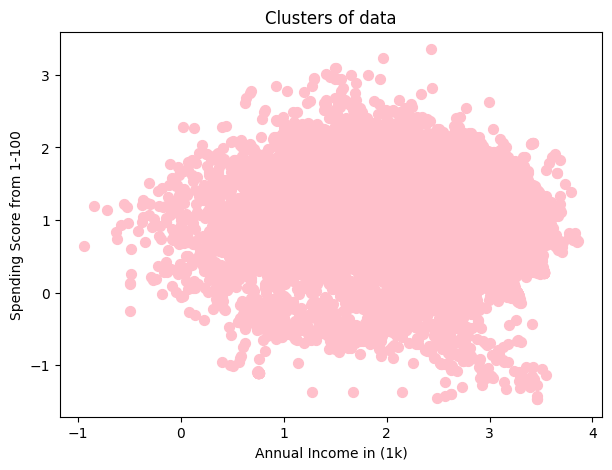

In [19]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')
plt.show()



# HIERARCHICAL CLUSTERING****

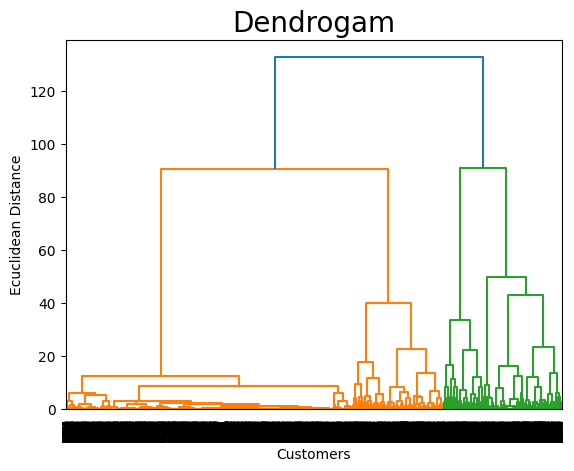

In [20]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


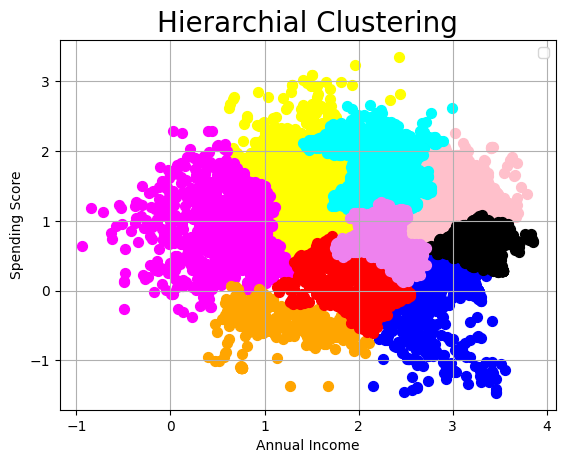

In [21]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 9, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_hc == 5, 0], x[y_hc == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_hc == 6, 0], x[y_hc == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_hc == 7, 0], x[y_hc == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_hc == 8, 0], x[y_hc == 8, 1], s = 50, c = 'violet')


plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()